In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# read emoticon dataset
train_text_seq_df = pd.read_csv("/content/drive/MyDrive/train_text_seq.csv")
train_text_seq_X = train_text_seq_df['input_str'].tolist()
train_text_seq_Y = train_text_seq_df['label'].tolist()

test_text_seq_X = pd.read_csv("/content/drive/MyDrive/test_text_seq.csv")['input_str'].tolist()


print(f"Train dataset size: ")
print(f"train_str_X: {len(train_text_seq_X)} train_text_seq_Y: {len(train_text_seq_Y)}")

print()
print("Test dataset size: ")
print(f"test_text_seq_X: {len(test_text_seq_X)}")

Train dataset size: 
train_str_X: 7080 train_text_seq_Y: 7080

Test dataset size: 
test_text_seq_X: 2232


In [ ]:
train_text_seq_df.head(5)

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [ ]:
# read text_sequence dataset
valid_text_seq_df = pd.read_csv("/content/drive/MyDrive/valid_text_seq.csv")
valid_text_seq_X = valid_text_seq_df['input_str'].tolist()
valid_text_seq_Y = valid_text_seq_df['label'].tolist()
valid_text_seq_df.head(5)

,input_str,label
0,0004221543626231596614341412624642841596614262...,1
1,0004646141250615436232726215964221596262614284...,1
2,0004224644543615436262336561415962713262159628...,0
3,0000154361120159643716142624224646143132262284...,0
4,0003324159623684154366144644222625705614284159...,1


## Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def one_hot_encode(sequences):
    # Split each input string into individual characters
    sequences_split = [list(seq) for seq in sequences]

    # Convert to DataFrame to use OneHotEncoder
    sequences_df = pd.DataFrame(sequences_split)

    # Initialize OneHotEncoder and fit-transform the DataFrame
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(sequences_df)

    return X_encoded, encoder

# Assume train_text_seq_X, valid_text_seq_X, train_text_seq_Y, and valid_text_seq_Y are predefined
# One-hot encode the training data and validation data
X_train_encoded, encoder = one_hot_encode(train_text_seq_X)
X_valid_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in valid_text_seq_X]))

# Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_valid = np.array(valid_text_seq_Y)

# Step 6: Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings appear
log_reg_model.fit(X_train_encoded, y_train)

# Step 7: Evaluate the model on the validation set
y_valid_pred = log_reg_model.predict(X_valid_encoded)
validation_accuracy = accuracy_score(y_valid, y_valid_pred)

print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Step 8: Predict on the test set (if needed)
# Assume test_text_seq_X is predefined
X_test_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in test_text_seq_X]))
test_predictions = log_reg_model.predict(X_test_encoded)

print(f"Predictions on test set: {test_predictions}")

Validation Accuracy: 65.24%
Predictions on test set: [0 1 1 ... 0 1 1]


20% of training data used | Validation Accuracy: 0.5910
40% of training data used | Validation Accuracy: 0.6319
60% of training data used | Validation Accuracy: 0.6442
80% of training data used | Validation Accuracy: 0.6442
100% of training data used | Validation Accuracy: 0.6524


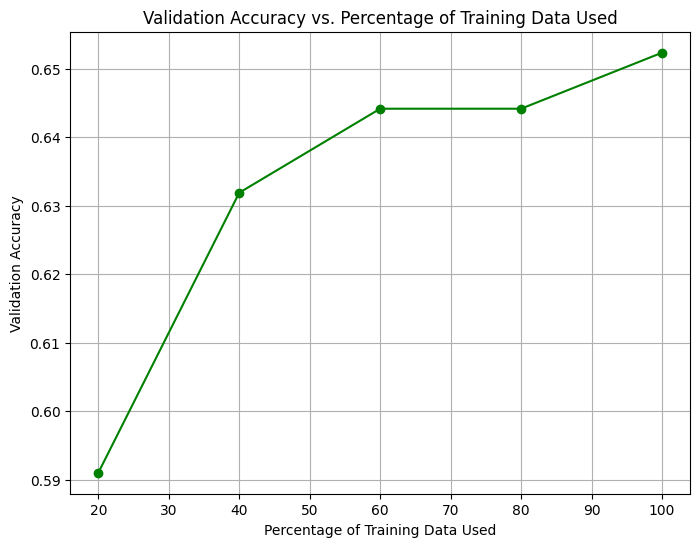

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1: Read the dataset
train_text_seq_df = pd.read_csv("/content/drive/MyDrive/train_text_seq.csv")
train_text_seq_X = train_text_seq_df['input_str'].tolist()
train_text_seq_Y = train_text_seq_df['label'].tolist()

valid_text_seq_df = pd.read_csv("/content/drive/MyDrive/valid_text_seq.csv")
valid_text_seq_X = valid_text_seq_df['input_str'].tolist()
valid_text_seq_Y = valid_text_seq_df['label'].tolist()

# Step 2: One-Hot Encode the input strings
def one_hot_encode(sequences):
    sequences_split = [list(seq) for seq in sequences]
    sequences_df = pd.DataFrame(sequences_split)
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_encoded = encoder.fit_transform(sequences_df)
    return X_encoded, encoder

# One-hot encode the training data and validation data
X_train_encoded, encoder = one_hot_encode(train_text_seq_X)
X_valid_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in valid_text_seq_X]))

# Step 3: Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_valid = np.array(valid_text_seq_Y)

# Step 4: Initialize percentages of training data to use
percentages = [20, 40, 60, 80, 100]  # Percentage of training data used
val_accuracies = []

# Step 5: Train Logistic Regression for each percentage of training data
for percent in percentages:
    if percent < 100:
        # Get the subset of the training data
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train_encoded, y_train, train_size=percent/100.0, random_state=42)
    else:
        # If 100%, use the entire dataset
        X_train_subset = X_train_encoded
        y_train_subset = y_train

    # Train Logistic Regression model
    logreg_model = LogisticRegression(max_iter=500)
    logreg_model.fit(X_train_subset, y_train_subset)

    # Predict on validation set
    y_val_pred = logreg_model.predict(X_valid_encoded)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_valid, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"{percent}% of training data used | Validation Accuracy: {val_accuracy:.4f}")

# Step 6: Plot the results
plt.figure(figsize=(8, 6))
plt.plot(percentages, val_accuracies, marker='o', color='green')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Percentage of Training Data Used')
plt.grid(True)
plt.show()


SVM + AVERAGING

>



20% of training data used | Validation Accuracy: 0.6135
40% of training data used | Validation Accuracy: 0.6380
60% of training data used | Validation Accuracy: 0.6319
80% of training data used | Validation Accuracy: 0.6564
100% of training data used | Validation Accuracy: 0.6564


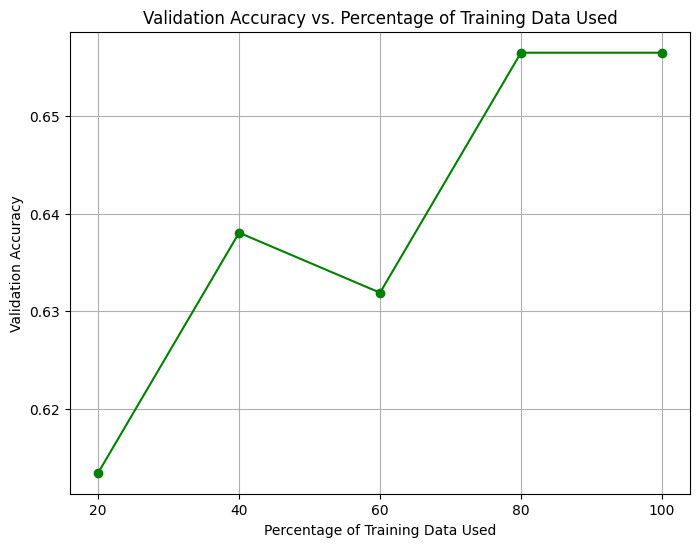

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1: Read the dataset
train_text_seq_df = pd.read_csv("/content/drive/MyDrive/train_text_seq.csv")
train_text_seq_X = train_text_seq_df['input_str'].tolist()
train_text_seq_Y = train_text_seq_df['label'].tolist()

valid_text_seq_df = pd.read_csv("/content/drive/MyDrive/valid_text_seq.csv")
valid_text_seq_X = valid_text_seq_df['input_str'].tolist()
valid_text_seq_Y = valid_text_seq_df['label'].tolist()

# Step 2: One-Hot Encode the input strings
def one_hot_encode(sequences):
    sequences_split = [list(seq) for seq in sequences]
    sequences_df = pd.DataFrame(sequences_split)
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_encoded = encoder.fit_transform(sequences_df)
    return X_encoded, encoder

# One-hot encode the training data and validation data
X_train_encoded, encoder = one_hot_encode(train_text_seq_X)
X_valid_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in valid_text_seq_X]))

# Step 3: Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_valid = np.array(valid_text_seq_Y)

# Step 4: Define percentages of training data to use
percentages = [ 20, 40, 60, 80, 100]  # Different percentages of training data to use
val_accuracies = []

# Step 5: Train SVM models on increasing percentages of the training data
for percent in percentages:
    # Get a subset of the training data
    train_size = percent / 100.0
    # Make sure we don't exceed the number of samples available
    if train_size >= 1.0:
        train_size = (X_train_encoded.shape[0] - 1) / X_train_encoded.shape[0]  # leave at least 1 for validation

    X_train_subset, _, y_train_subset, _ = train_test_split(X_train_encoded, y_train, train_size=train_size, random_state=42)

    # Train an SVM model on the subset
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train_subset, y_train_subset)

    # Predict on the validation set
    y_val_pred = svm_model.predict(X_valid_encoded)

    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_valid, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"{percent}% of training data used | Validation Accuracy: {val_accuracy:.4f}")

# Step 6: Plot the results
plt.figure(figsize=(8, 6))
plt.plot(percentages, val_accuracies, marker='o', color='green')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Percentage of Training Data Used')
plt.grid(True)
plt.xticks(percentages)  # Ensure x-ticks are set to percentages
plt.show()


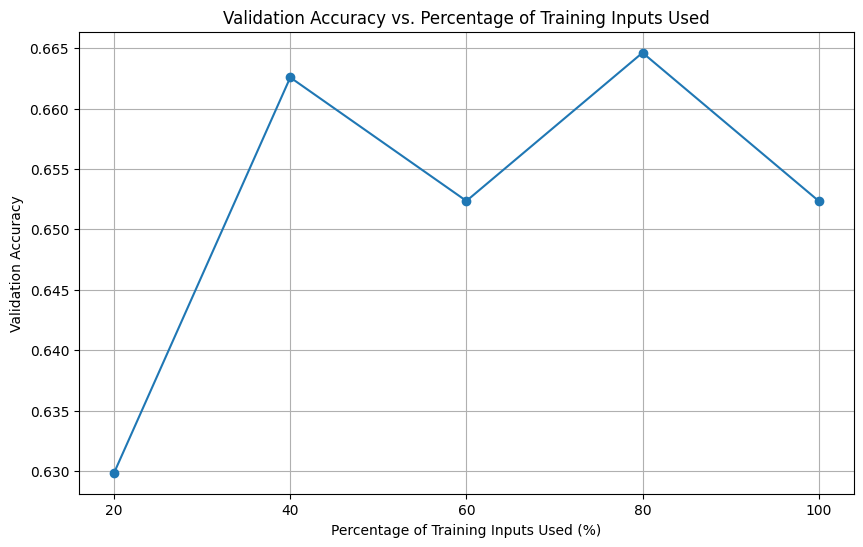

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def one_hot_encode(sequences):
    # Split each input string into individual characters
    sequences_split = [list(seq) for seq in sequences]
    sequences_df = pd.DataFrame(sequences_split)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(sequences_df)
    return X_encoded, encoder

# Assuming train_text_seq_X, valid_text_seq_X, train_text_seq_Y, valid_text_seq_Y are predefined
# One-hot encode the training data and validation data
X_train_encoded, encoder = one_hot_encode(train_text_seq_X)
X_valid_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in valid_text_seq_X]))

# Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_valid = np.array(valid_text_seq_Y)

# List to hold validation accuracies
validation_accuracies = []
percentages_used = [20, 40, 60, 80, 100]  # Specify desired percentages

# Iterate over specified percentages of the training data
for percentage in percentages_used:
    # Calculate the number of samples to use
    n_samples = int(len(X_train_encoded) * (percentage / 100))

    # Select a subset of the training data
    X_train_subset = X_train_encoded[:n_samples]
    y_train_subset = y_train[:n_samples]

    # Initialize and train the Logistic Regression model
    log_reg_model = LogisticRegression(max_iter=1000)
    log_reg_model.fit(X_train_subset, y_train_subset)

    # Evaluate the model on the validation set
    y_valid_pred = log_reg_model.predict(X_valid_encoded)
    validation_accuracy = accuracy_score(y_valid, y_valid_pred)

    # Record the accuracy
    validation_accuracies.append(validation_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(percentages_used, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. Percentage of Training Inputs Used')
plt.xlabel('Percentage of Training Inputs Used (%)')
plt.ylabel('Validation Accuracy')
plt.xticks(percentages_used)  # Set x-ticks to specified percentages
 # Accuracy range from 0 to 1
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:42:57] WARNING: /workspace

Validation Accuracy with 100% training data: 69.53%


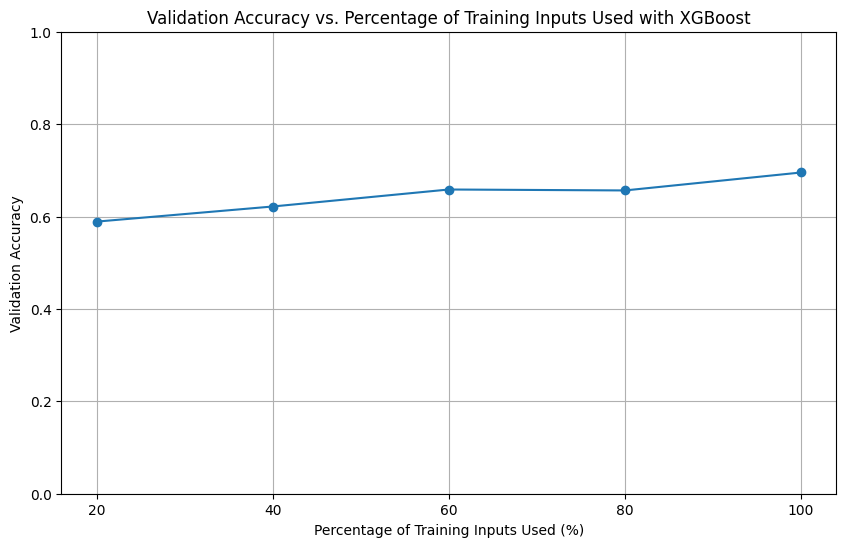

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb

def one_hot_encode(sequences):
    # Split each input string into individual characters
    sequences_split = [list(seq) for seq in sequences]
    sequences_df = pd.DataFrame(sequences_split)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(sequences_df)
    return X_encoded, encoder

# Assuming train_text_seq_X, valid_text_seq_X, train_text_seq_Y, valid_text_seq_Y are predefined
# One-hot encode the training data and validation data
X_train_encoded, encoder = one_hot_encode(train_text_seq_X)
X_valid_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in valid_text_seq_X]))

# Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_valid = np.array(valid_text_seq_Y)

# List to hold validation accuracies
validation_accuracies = []
percentages_used = [20, 40, 60, 80, 100]  # Specify desired percentages

# Iterate over specified percentages of the training data
for percentage in percentages_used:
    # Calculate the number of samples to use
    n_samples = int(len(X_train_encoded) * (percentage / 100))

    # Select a subset of the training data
    X_train_subset = X_train_encoded[:n_samples]
    y_train_subset = y_train[:n_samples]

    # Initialize and train the XGBoost model
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_iter=1000)
    xgb_model.fit(X_train_subset, y_train_subset)

    # Evaluate the model on the validation set
    y_valid_pred = xgb_model.predict(X_valid_encoded)
    validation_accuracy = accuracy_score(y_valid, y_valid_pred)

    # Record the accuracy
    validation_accuracies.append(validation_accuracy)

print(f"Validation Accuracy with {percentage}% training data: {validation_accuracy * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(percentages_used, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. Percentage of Training Inputs Used with XGBoost')
plt.xlabel('Percentage of Training Inputs Used (%)')
plt.ylabel('Validation Accuracy')
plt.xticks(percentages_used)  # Set x-ticks to specified percentages

plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Validation Accuracy with 20% training data: 50.72%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Validation Accuracy with 40% training data: 51.53%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Validation Accuracy with 60% training data: 51.33%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Validation Accuracy with 80% training data: 49.28%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Validation Accuracy with 100% training data: 50.51%


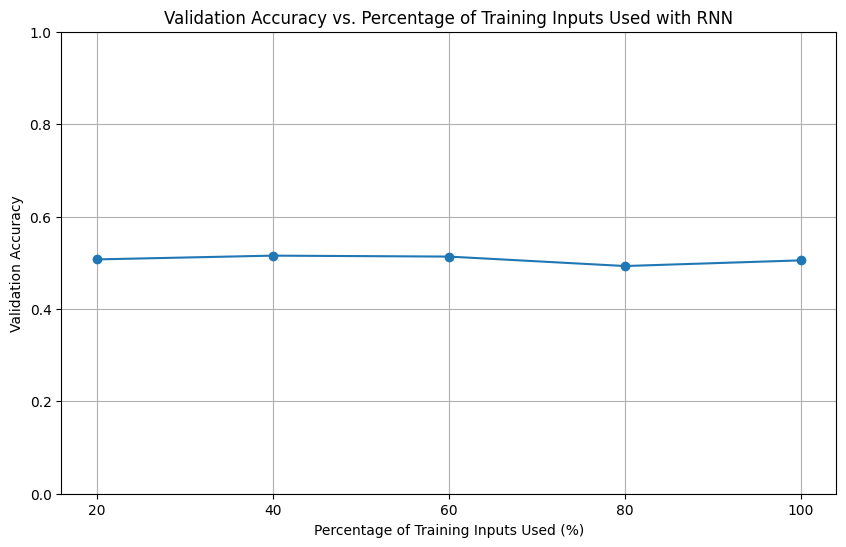

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def one_hot_encode(sequences):
    # Split each input string into individual characters
    sequences_split = [list(seq) for seq in sequences]
    sequences_df = pd.DataFrame(sequences_split)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(sequences_df)
    return X_encoded, encoder

# Assuming train_text_seq_X, valid_text_seq_X, train_text_seq_Y, valid_text_seq_Y are predefined
# One-hot encode the training data and validation data
X_train_encoded, encoder = one_hot_encode(train_text_seq_X)
X_valid_encoded = encoder.transform(pd.DataFrame([list(seq) for seq in valid_text_seq_X]))

# Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_valid = np.array(valid_text_seq_Y)

# Reshape the data for RNN input
# RNN expects input of shape (samples, timesteps, features)
X_train_encoded = X_train_encoded.reshape((X_train_encoded.shape[0], X_train_encoded.shape[1], 1))
X_valid_encoded = X_valid_encoded.reshape((X_valid_encoded.shape[0], X_valid_encoded.shape[1], 1))

# List to hold validation accuracies
validation_accuracies = []
percentages_used = [20, 40, 60, 80, 100]  # Specify desired percentages

# Iterate over specified percentages of the training data
for percentage in percentages_used:
    # Calculate the number of samples to use
    n_samples = int(len(X_train_encoded) * (percentage / 100))

    # Select a subset of the training data
    X_train_subset = X_train_encoded[:n_samples]
    y_train_subset = y_train[:n_samples]

    # Initialize and build the RNN model
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(50, input_shape=(X_train_subset.shape[1], X_train_subset.shape[2]), return_sequences=False))
    rnn_model.add(Dense(1, activation='sigmoid'))  # Adjust activation for binary classification

    # Compile the model
    rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the RNN model
    rnn_model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

    # Evaluate the model on the validation set
    y_valid_pred = (rnn_model.predict(X_valid_encoded) > 0.5).astype("int32")  # Convert probabilities to binary predictions
    validation_accuracy = accuracy_score(y_valid, y_valid_pred)

    # Record the accuracy
    validation_accuracies.append(validation_accuracy)

    # Print the accuracy value against each percentage of training input used
    print(f"Validation Accuracy with {percentage}% training data: {validation_accuracy * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(percentages_used, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. Percentage of Training Inputs Used with RNN')
plt.xlabel('Percentage of Training Inputs Used (%)')
plt.ylabel('Validation Accuracy')
plt.xticks(percentages_used)  # Set x-ticks to specified percentages
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.grid()
plt.show()


## LSTM

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load datasets
train_text_seq_df = pd.read_csv("/content/drive/MyDrive/train_text_seq.csv")
train_text_seq_X = train_text_seq_df['input_str'].tolist()
train_text_seq_Y = train_text_seq_df['label'].tolist()

valid_text_seq_df = pd.read_csv("/content/drive/MyDrive/valid_text_seq.csv")
valid_text_seq_X = valid_text_seq_df['input_str'].tolist()
valid_text_seq_Y = valid_text_seq_df['label'].tolist()

test_text_seq_X = pd.read_csv("/content/drive/MyDrive/test_text_seq.csv")['input_str'].tolist()

# Tokenize the input sequences
tokenizer = Tokenizer(char_level=True)  # You can use word-level as well
tokenizer.fit_on_texts(train_text_seq_X)

# Convert text sequences to integer sequences
train_seq = tokenizer.texts_to_sequences(train_text_seq_X)
valid_seq = tokenizer.texts_to_sequences(valid_text_seq_X)
test_seq = tokenizer.texts_to_sequences(test_text_seq_X)

# Pad sequences to ensure equal length
max_seq_length = max(len(seq) for seq in train_seq)  # You can also fix a value

X_train = pad_sequences(train_seq, maxlen=max_seq_length, padding='post')
X_val = pad_sequences(valid_seq, maxlen=max_seq_length, padding='post')
test_seq = pad_sequences(test_seq, maxlen=max_seq_length, padding='post')

# Convert labels to numpy array
y_train = np.array(train_text_seq_Y)
y_val = np.array(valid_text_seq_Y)

# Split train dataset further into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(train_seq, train_text_seq_Y, test_size=0.2, random_state=42)

# Print data statistics
print(f"Train dataset size: {len(X_train)}")
print(f"Validation dataset size: {len(X_val)}")
print(f"Test dataset size: {len(test_seq)}")

Train dataset size: 7080
Validation dataset size: 489
Test dataset size: 2232


In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from tensorflow.keras.layers import Dropout, LSTM, Embedding, Dense
vocab_size = len(tokenizer.word_index) + 1

model_lstm = Sequential()

# Embedding layer (trainable params = input_dim * embedding_dim)
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_seq_length))

model_lstm.add(LSTM(units=32))

# Add a Dropout layer to prevent overfitting
model_lstm.add(Dropout(0.20))

# Output layer (binary classification)
model_lstm.add(Dense(1, activation='sigmoid'))

# Optimizer: 'adam' is a popular optimizer that adapts the learning rate during training
# Loss: 'binary_crossentropy' is suitable for binary classification problems
# Metrics: 'accuracy' monitors the model’s performance in terms of classification accuracy
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify number of parameters
model_lstm.summary()

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5138 - loss: 0.6922 - val_accuracy: 0.5992 - val_loss: 0.6573
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5992 - loss: 0.6597 - val_accuracy: 0.6299 - val_loss: 0.6568
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5951 - loss: 0.6563 - val_accuracy: 0.6155 - val_loss: 0.6455
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6096 - loss: 0.6493 - val_accuracy: 0.6074 - val_loss: 0.6417
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6303 - loss: 0.6403 - val_accuracy: 0.6339 - val_loss: 0.6330
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6300 - loss: 0.6365 - val_accuracy: 0.6319 - val_loss: 0.6377
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6288 - loss: 0.6382 - val_accuracy: 0.6299 - val_loss: 0.6342
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6325 - loss: 0.6350 -

In [ ]:
val_loss, val_acc = model_lstm.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.8098


In [ ]:
model_lstm.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ (None, 50, 32)              │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,117 (102.02 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,412 (68.02 KB)

In [ ]:
# Function to create the LSTM model
def create_model(vocab_size, max_seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_seq_length))
    model.add(LSTM(units=32))
    model.add(Dropout(0.20))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Training model with 20% of training data
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.4603 - loss: 0.6943 - val_accuracy: 0.5583 - val_loss: 0.6920
Epoch 2/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5316 - loss: 0.6915 - val_accuracy: 0.5501 - val_loss: 0.6879
Epoch 3/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5787 - loss: 0.6863 - val_accuracy: 0.5787 - val_loss: 0.6782
Epoch 4/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5965 - loss: 0.6671 - val_accuracy: 0.6135 - val_loss: 0.6673
Epoch 5/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6428 - loss: 0.6450 - val_accuracy: 0.6155 - val_loss: 0.6556
Epoch 6/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6418 - loss: 0.6382 - val_accuracy: 0.6115 - val_loss: 0.6533
Epoch 7/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6403 - loss: 0.6371 - val_accuracy: 0.6278 - val_loss: 0.6522
Epoch 8/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6260 - loss: 0.6278 - val_accuracy: 0.6135 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.4899 - loss: 0.6935 - val_accuracy: 0.5583 - val_loss: 0.6921
Epoch 2/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5279 - loss: 0.6911 - val_accuracy: 0.5746 - val_loss: 0.6760
Epoch 3/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5947 - loss: 0.6652 - val_accuracy: 0.6401 - val_loss: 0.6554
Epoch 4/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6263 - loss: 0.6500 - val_accuracy: 0.6176 - val_loss: 0.6476
Epoch 5/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6280 - loss: 0.6443 - val_accuracy: 0.6299 - val_loss: 0.6470
Epoch 6/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6082 - loss: 0.6481 - val_accuracy: 0.6401 - val_loss: 0.6462
Epoch 7/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6578 - loss: 0.6343 - val_accuracy: 0.6483 - val_loss: 0.6382
Epoch 8/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6510 - loss: 0.6299 - val_accuracy: 0.6360 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.5043 - loss: 0.6929 - val_accuracy: 0.4888 - val_loss: 0.6915
Epoch 2/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5634 - loss: 0.6828 - val_accuracy: 0.6176 - val_loss: 0.6653
Epoch 3/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6207 - loss: 0.6470 - val_accuracy: 0.6503 - val_loss: 0.6507
Epoch 4/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6241 - loss: 0.6503 - val_accuracy: 0.5951 - val_loss: 0.6640
Epoch 5/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6116 - loss: 0.6436 - val_accuracy: 0.6319 - val_loss: 0.6455
Epoch 6/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6276 - loss: 0.6450 - val_accuracy: 0.6339 - val_loss: 0.6460
Epoch 7/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6326 - loss: 0.6404 - val_accuracy: 0.6278 - val_loss: 0.6377
Epoch 8/60
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6176 - loss: 0.6445 - val_accuracy: 0.636

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.5072 - loss: 0.6928 - val_accuracy: 0.6053 - val_loss: 0.6708
Epoch 2/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5936 - loss: 0.6673 - val_accuracy: 0.6094 - val_loss: 0.6543
Epoch 3/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6205 - loss: 0.6486 - val_accuracy: 0.6360 - val_loss: 0.6435
Epoch 4/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6204 - loss: 0.6464 - val_accuracy: 0.6339 - val_loss: 0.6383
Epoch 5/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6273 - loss: 0.6371 - val_accuracy: 0.6421 - val_loss: 0.6407
Epoch 6/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6368 - loss: 0.6368 - val_accuracy: 0.6421 - val_loss: 0.6337
Epoch 7/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6372 - loss: 0.6352 - val_accuracy: 0.6524 - val_loss: 0.6264
Epoch 8/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6453 - loss: 0.6290 - val_accuracy: 0.636

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5075 - loss: 0.6927 - val_accuracy: 0.4888 - val_loss: 0.6988
Epoch 2/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5910 - loss: 0.6683 - val_accuracy: 0.6503 - val_loss: 0.6467
Epoch 3/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6261 - loss: 0.6439 - val_accuracy: 0.6401 - val_loss: 0.6389
Epoch 4/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6329 - loss: 0.6421 - val_accuracy: 0.6462 - val_loss: 0.6347
Epoch 5/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6258 - loss: 0.6407 - val_accuracy: 0.6196 - val_loss: 0.6387
Epoch 6/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6253 - loss: 0.6345 - val_accuracy: 0.6299 - val_loss: 0.6325
Epoch 7/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6283 - loss: 0.6348 - val_accuracy: 0.6605 - val_loss: 0.6263
Epoch 8/60
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6570 - loss: 0.6239 - val_accuracy: 0.65

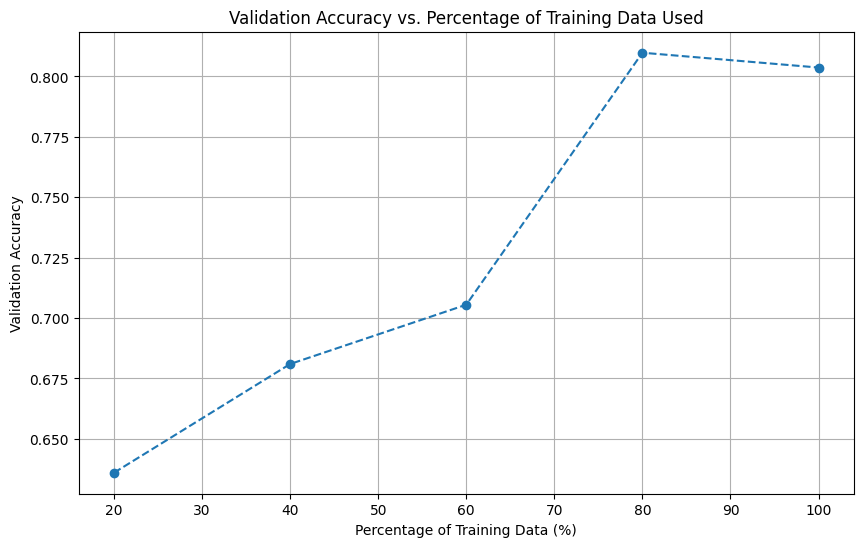

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K

# Initialize percentages of data to be used for training
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

vocab_size = len(tokenizer.word_index) + 1

# List to store validation accuracies
validation_accuracies = []

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Loop over different percentages of training data
for p in percentages:
    print(f"Training model with {int(p * 100)}% of training data")

    # Clear the Keras session to free memory
    K.clear_session()

    # Calculate the subset size
    subset_size = int(len(X_train) * p)

    # Use only the subset of training data
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # Create a new instance of the model for each run
    model_lstm = create_model(vocab_size, max_seq_length)

    # Train the model on the subset of data
    model_lstm.fit(X_train_subset, y_train_subset, validation_data=(X_val, y_val),
                   epochs=60, batch_size=32)

    # Evaluate the model on the validation set
    y_pred = (model_lstm.predict(X_val) > 0.5).astype("int32")
    accuracy = accuracy_score(y_val, y_pred)

    # Store the validation accuracy
    validation_accuracies.append(accuracy)
    print(f"Validation Accuracy with {int(p * 100)}% of data: {accuracy:.4f}")

# Plotting Validation Accuracy vs. Percentage of Training Data Used
plt.figure(figsize=(10, 6))
plt.plot(np.array(percentages) * 100, validation_accuracies, marker='o', linestyle='--')
plt.title("Validation Accuracy vs. Percentage of Training Data Used")
plt.xlabel("Percentage of Training Data (%)")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()


**Best model for dataset is LSTM with Dropout Layer, we'll use 80% for data with gives about 81% accuracy**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Using 80% dataset
subset_size = int(len(X_train) * 0.8)

# Use only the subset of training data
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create a new instance of the model for each run
model_lstm = create_model(vocab_size, max_seq_length)

# Train the model on the subset of data
model_lstm.fit(X_train_subset, y_train_subset, validation_data=(X_val, y_val),
                   epochs=60, batch_size=32)

y_pred = model_lstm.predict(test_seq)
np.savetxt('y_pred.txt', y_pred, fmt='%f')

print("Predictions saved to y_pred.txt")D

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.5091 - loss: 0.6925 - val_accuracy: 0.6196 - val_loss: 0.6686
Epoch 2/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5897 - loss: 0.6697 - val_accuracy: 0.6339 - val_loss: 0.6481
Epoch 3/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6287 - loss: 0.6497 - val_accuracy: 0.6360 - val_loss: 0.6407
Epoch 4/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6259 - loss: 0.6405 - val_accuracy: 0.6401 - val_loss: 0.6463
Epoch 5/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.6114 - loss: 0.6454 - val_accuracy: 0.6401 - val_loss: 0.6393
Epoch 6/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6372 - loss: 0.6321 - val_accuracy: 0.6503 - val_loss: 0.6324
Epoch 7/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6293 - loss: 0.6373 - val_accuracy: 0.6176 - val_loss: 0.6440
Epoch 8/60
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6511 - loss: 0.6178 - val_accuracy: 0.640